## Load Libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error as mae , r2_score
import warnings
warnings.filterwarnings(action='ignore')

# Load data

In [2]:
df=pd.read_csv("dataset.csv")
df

,stn_code,sampling_date,state,location,agency,type,so2,no2,rspm,spm,location_monitoring_station,pm2_5,date
0,150.0,February - M021990,Andhra Pradesh,Hyderabad,NaN,"Residential, Rural and other Areas",4.8,17.4,NaN,NaN,NaN,NaN,2/1/1990
1,151.0,February - M021990,Andhra Pradesh,Hyderabad,NaN,Industrial Area,3.1,7.0,NaN,NaN,NaN,NaN,2/1/1990
2,152.0,February - M021990,Andhra Pradesh,Hyderabad,NaN,"Residential, Rural and other Areas",6.2,28.5,NaN,NaN,NaN,NaN,2/1/1990
3,150.0,March - M031990,Andhra Pradesh,Hyderabad,NaN,"Residential, Rural and other Areas",6.3,14.7,NaN,NaN,NaN,NaN,3/1/1990
4,151.0,March - M031990,Andhra Pradesh,Hyderabad,NaN,Industrial Area,4.7,7.5,NaN,NaN,NaN,NaN,3/1/1990
...,...,...,...,...,...,...,...,...,...,...,...,...,...
435737,SAMP,24-12-15,West Bengal,ULUBERIA,West Bengal State Pollution Control Board,RIRUO,22.0,50.0,143.0,NaN,"Inside Rampal Industries,ULUBERIA",NaN,12/24/2015
435738,SAMP,29-12-15,West Bengal,ULUBERIA,West Bengal State Pollution Control Board,RIRUO,20.0,46.0,171.0,NaN,"Inside Rampal Industries,ULUBERIA",NaN,12/29/2015
435739,NaN,NaN,andaman-and-nicobar-islands,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
435740,NaN,NaN,Lakshadweep,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


## Understand the data

In [3]:
df['state'].unique()

array(['Andhra Pradesh', 'Arunachal Pradesh', 'Assam', 'Bihar',
       'Chandigarh', 'Chhattisgarh', 'Dadra & Nagar Haveli',
       'Daman & Diu', 'Delhi', 'Goa', 'Gujarat', 'Haryana',
       'Himachal Pradesh', 'Jammu & Kashmir', 'Jharkhand', 'Karnataka',
       'Kerala', 'Madhya Pradesh', 'Maharashtra', 'Manipur', 'Meghalaya',
       'Mizoram', 'Nagaland', 'Odisha', 'Puducherry', 'Punjab',
       'Rajasthan', 'Sikkim', 'Tamil Nadu', 'Telangana', 'Uttar Pradesh',
       'Uttarakhand', 'Uttaranchal', 'West Bengal',
       'andaman-and-nicobar-islands', 'Lakshadweep', 'Tripura'],
      dtype=object)

In [4]:
df.describe()

,so2,no2,rspm,spm,pm2_5
count,401096.000000,419509.000000,395520.000000,198355.000000,9314.000000
mean,10.829414,25.809623,108.832784,220.783480,40.791467
std,11.177187,18.503086,74.872430,151.395457,30.832525
min,0.000000,0.000000,0.000000,0.000000,3.000000
25%,5.000000,14.000000,56.000000,111.000000,24.000000
50%,8.000000,22.000000,90.000000,187.000000,32.000000
75%,13.700000,32.200000,142.000000,296.000000,46.000000
max,909.000000,876.000000,6307.033333,3380.000000,504.000000


In [5]:
df['state'].unique()

array(['Andhra Pradesh', 'Arunachal Pradesh', 'Assam', 'Bihar',
       'Chandigarh', 'Chhattisgarh', 'Dadra & Nagar Haveli',
       'Daman & Diu', 'Delhi', 'Goa', 'Gujarat', 'Haryana',
       'Himachal Pradesh', 'Jammu & Kashmir', 'Jharkhand', 'Karnataka',
       'Kerala', 'Madhya Pradesh', 'Maharashtra', 'Manipur', 'Meghalaya',
       'Mizoram', 'Nagaland', 'Odisha', 'Puducherry', 'Punjab',
       'Rajasthan', 'Sikkim', 'Tamil Nadu', 'Telangana', 'Uttar Pradesh',
       'Uttarakhand', 'Uttaranchal', 'West Bengal',
       'andaman-and-nicobar-islands', 'Lakshadweep', 'Tripura'],
      dtype=object)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 435742 entries, 0 to 435741
Data columns (total 13 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   stn_code                     291665 non-null  object 
 1   sampling_date                435739 non-null  object 
 2   state                        435742 non-null  object 
 3   location                     435739 non-null  object 
 4   agency                       286261 non-null  object 
 5   type                         430349 non-null  object 
 6   so2                          401096 non-null  float64
 7   no2                          419509 non-null  float64
 8   rspm                         395520 non-null  float64
 9   spm                          198355 non-null  float64
 10  location_monitoring_station  408251 non-null  object 
 11  pm2_5                        9314 non-null    float64
 12  date                         435735 non-null  object 
dtyp

In [7]:
df.columns

Index(['stn_code', 'sampling_date', 'state', 'location', 'agency', 'type',
       'so2', 'no2', 'rspm', 'spm', 'location_monitoring_station', 'pm2_5',
       'date'],
      dtype='object')

In [8]:
df.shape 

(435742, 13)

In [9]:
df['state'].unique()

array(['Andhra Pradesh', 'Arunachal Pradesh', 'Assam', 'Bihar',
       'Chandigarh', 'Chhattisgarh', 'Dadra & Nagar Haveli',
       'Daman & Diu', 'Delhi', 'Goa', 'Gujarat', 'Haryana',
       'Himachal Pradesh', 'Jammu & Kashmir', 'Jharkhand', 'Karnataka',
       'Kerala', 'Madhya Pradesh', 'Maharashtra', 'Manipur', 'Meghalaya',
       'Mizoram', 'Nagaland', 'Odisha', 'Puducherry', 'Punjab',
       'Rajasthan', 'Sikkim', 'Tamil Nadu', 'Telangana', 'Uttar Pradesh',
       'Uttarakhand', 'Uttaranchal', 'West Bengal',
       'andaman-and-nicobar-islands', 'Lakshadweep', 'Tripura'],
      dtype=object)

## Data Cleaning

In [10]:
# extracting the useful columns from data:deleting unwanted columns
def colm(df, col):
    df.drop(col, axis=1, inplace=True)
    

colm(df,'stn_code')
colm(df,'location_monitoring_station')
colm(df,'agency')
colm(df, 'sampling_date')

In [11]:
df.isnull().sum()

state            0
location         3
type          5393
so2          34646
no2          16233
rspm         40222
spm         237387
pm2_5       426428
date             7
dtype: int64

In [12]:
#finding the state names in data.and replacing old name of state with new name of state
df['state']=df['state'].replace('Uttaranchal', 'Uttarakhand')

df['state'].unique()

l=[df['state']]


In [13]:
df['state'].unique()

array(['Andhra Pradesh', 'Arunachal Pradesh', 'Assam', 'Bihar',
       'Chandigarh', 'Chhattisgarh', 'Dadra & Nagar Haveli',
       'Daman & Diu', 'Delhi', 'Goa', 'Gujarat', 'Haryana',
       'Himachal Pradesh', 'Jammu & Kashmir', 'Jharkhand', 'Karnataka',
       'Kerala', 'Madhya Pradesh', 'Maharashtra', 'Manipur', 'Meghalaya',
       'Mizoram', 'Nagaland', 'Odisha', 'Puducherry', 'Punjab',
       'Rajasthan', 'Sikkim', 'Tamil Nadu', 'Telangana', 'Uttar Pradesh',
       'Uttarakhand', 'West Bengal', 'andaman-and-nicobar-islands',
       'Lakshadweep', 'Tripura'], dtype=object)

In [14]:
# function to delete the columns not contributing much to data
def row_del(df, col):
    df.dropna(axis=0,subset=[col], inplace=True)

In [15]:
row_del(df, 'type')

row_del(df,  "location")

row_del(df,'date')

In [16]:
# function to replace the null values with Mean
def replace_nan(df, col):
    df[col]=df[col].replace(np.NaN, df[col].median())

In [17]:
replace_nan(df,  "so2")

replace_nan(df,'no2')

replace_nan(df, "rspm")

replace_nan(df, 'spm')

In [18]:
#finding the rest of the null values
df.isnull().sum()

state            0
location         0
type             0
so2              0
no2              0
rspm             0
spm              0
pm2_5       421031
date             0
dtype: int64

In [19]:
# removing and combining the redundat types

df['type'].value_counts()

Residential, Rural and other Areas    179013
Industrial Area                        96089
Residential and others                 86791
Industrial Areas                       51747
Sensitive Area                          8979
Sensitive Areas                         5536
RIRUO                                   1304
Sensitive                                495
Industrial                               233
Residential                              158
Name: type, dtype: int64

In [20]:
df['state'].unique()

array(['Andhra Pradesh', 'Arunachal Pradesh', 'Assam', 'Bihar',
       'Chandigarh', 'Chhattisgarh', 'Dadra & Nagar Haveli',
       'Daman & Diu', 'Delhi', 'Goa', 'Gujarat', 'Haryana',
       'Himachal Pradesh', 'Jammu & Kashmir', 'Jharkhand', 'Karnataka',
       'Kerala', 'Madhya Pradesh', 'Maharashtra', 'Manipur', 'Meghalaya',
       'Mizoram', 'Nagaland', 'Odisha', 'Puducherry', 'Punjab',
       'Rajasthan', 'Sikkim', 'Tamil Nadu', 'Telangana', 'Uttar Pradesh',
       'Uttarakhand', 'West Bengal'], dtype=object)

In [21]:
# removing redundant categories
a = list(df['type'])

for i in range(0, len(df)):
    if str(a[i][0]) == 'R' and a[i][1] == 'e':
        a[i] = 'Residential'
    elif str(a[i][0]) == 'I':
        a[i] = 'Industrial'
    else:
        a[i] = 'Other'
        
df['type'] = a
df['type'].value_counts()  

Residential    265962
Industrial     148069
Other           16314
Name: type, dtype: int64

In [22]:
# data after modifications.

df

,state,location,type,so2,no2,rspm,spm,pm2_5,date
0,Andhra Pradesh,Hyderabad,Residential,4.8,17.4,90.0,188.0,NaN,2/1/1990
1,Andhra Pradesh,Hyderabad,Industrial,3.1,7.0,90.0,188.0,NaN,2/1/1990
2,Andhra Pradesh,Hyderabad,Residential,6.2,28.5,90.0,188.0,NaN,2/1/1990
3,Andhra Pradesh,Hyderabad,Residential,6.3,14.7,90.0,188.0,NaN,3/1/1990
4,Andhra Pradesh,Hyderabad,Industrial,4.7,7.5,90.0,188.0,NaN,3/1/1990
...,...,...,...,...,...,...,...,...,...
435734,West Bengal,ULUBERIA,Other,20.0,44.0,148.0,188.0,NaN,12/15/2015
435735,West Bengal,ULUBERIA,Other,17.0,44.0,131.0,188.0,NaN,12/18/2015
435736,West Bengal,ULUBERIA,Other,18.0,45.0,140.0,188.0,NaN,12/21/2015
435737,West Bengal,ULUBERIA,Other,22.0,50.0,143.0,188.0,NaN,12/24/2015


## Removing the outliers

In [23]:
df['state'].unique()

array(['Andhra Pradesh', 'Arunachal Pradesh', 'Assam', 'Bihar',
       'Chandigarh', 'Chhattisgarh', 'Dadra & Nagar Haveli',
       'Daman & Diu', 'Delhi', 'Goa', 'Gujarat', 'Haryana',
       'Himachal Pradesh', 'Jammu & Kashmir', 'Jharkhand', 'Karnataka',
       'Kerala', 'Madhya Pradesh', 'Maharashtra', 'Manipur', 'Meghalaya',
       'Mizoram', 'Nagaland', 'Odisha', 'Puducherry', 'Punjab',
       'Rajasthan', 'Sikkim', 'Tamil Nadu', 'Telangana', 'Uttar Pradesh',
       'Uttarakhand', 'West Bengal'], dtype=object)

In [24]:
def box_plot(df, col):
    df.boxplot(column=col, figsize=(6,6))
    plt.tight_layout(pad=0.5)
    plt.show()

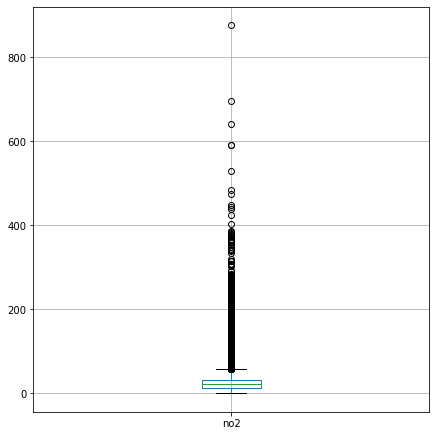

In [25]:
box_plot(df, 'no2')

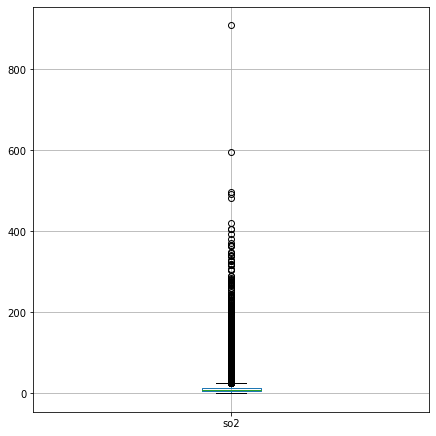

In [26]:
box_plot(df, 'so2')

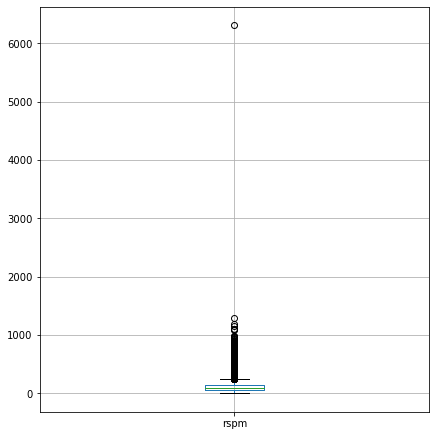

In [27]:
box_plot(df, 'rspm')

In [28]:
df['state'].unique()

array(['Andhra Pradesh', 'Arunachal Pradesh', 'Assam', 'Bihar',
       'Chandigarh', 'Chhattisgarh', 'Dadra & Nagar Haveli',
       'Daman & Diu', 'Delhi', 'Goa', 'Gujarat', 'Haryana',
       'Himachal Pradesh', 'Jammu & Kashmir', 'Jharkhand', 'Karnataka',
       'Kerala', 'Madhya Pradesh', 'Maharashtra', 'Manipur', 'Meghalaya',
       'Mizoram', 'Nagaland', 'Odisha', 'Puducherry', 'Punjab',
       'Rajasthan', 'Sikkim', 'Tamil Nadu', 'Telangana', 'Uttar Pradesh',
       'Uttarakhand', 'West Bengal'], dtype=object)

In [29]:
# function to remove the oulier
# maxn: max limit
def rem_outlier(df, col, maxn):
    df.loc[df[col] >maxn] = df[col].median()
    df.boxplot(column=col, figsize=(6,6))
    plt.tight_layout(pad=0.5)
    plt.show()

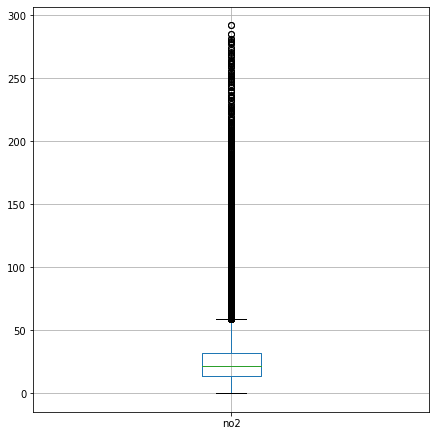

In [30]:

rem_outlier(df, 'no2', 300)


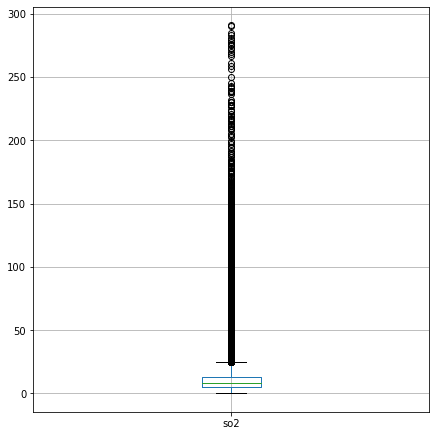

In [31]:

rem_outlier(df, 'so2', 300)

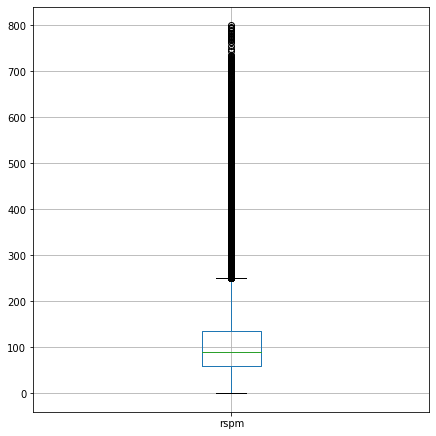

In [32]:

rem_outlier(df, 'rspm', 800)

In [33]:
df['state'].unique()

array(['Andhra Pradesh', 22.0, 'Arunachal Pradesh', 'Assam', 'Bihar',
       'Chandigarh', 'Chhattisgarh', 'Dadra & Nagar Haveli',
       'Daman & Diu', 'Delhi', 90.0, 'Goa', 'Gujarat', 'Haryana',
       'Himachal Pradesh', 'Jammu & Kashmir', 'Jharkhand', 'Karnataka',
       'Kerala', 'Madhya Pradesh', 'Maharashtra', 8.0, 'Manipur',
       'Meghalaya', 'Mizoram', 'Nagaland', 'Odisha', 'Puducherry',
       'Punjab', 'Rajasthan', 'Sikkim', 'Tamil Nadu', 'Telangana',
       'Uttar Pradesh', 'Uttarakhand', 'West Bengal'], dtype=object)

## Calculating AQI
    To calculate the AQI we would need to calculate the per pollutant index .

In [ ]:

def calculate_si(so2):
    si=0
    if (so2<=40):
     si= so2*(50/40)
    if (so2>40 and so2<=80):
     si= 50+(so2-40)*(50/40)
    if (so2>80 and so2<=380):
     si= 100+(so2-80)*(100/300)
    if (so2>380 and so2<=800):
     si= 200+(so2-380)*(100/800)
    if (so2>800 and so2<=1600):
     si= 300+(so2-800)*(100/800)
    if (so2>1600):
     si= 400+(so2-1600)*(100/800)
    return si

df['si']=df['so2'].apply(calculate_si)


In [ ]:
def ni(no2):
    ni=0
    if(no2<=40):
         ni= no2*50/40
    elif(no2>40 and no2<=80):
         ni= 50+(no2-14)*(50/40)
    elif(no2>80 and no2<=180):
         ni= 100+(no2-80)*(100/100)
    elif(no2>180 and no2<=280):
        ni= 200+(no2-180)*(100/100)
    elif(no2>280 and no2<=400):
         ni= 300+(no2-280)*(100/120)
    else:
         ni= 400+(no2-400)*(100/120)
    return ni

df['ni']=df['no2'].apply(ni)


In [ ]:
def calculate_(rspm):
    rpi=0
    if(rpi<=30):
     rpi=rpi*50/30
    elif(rpi>30 and rpi<=60):
     rpi=50+(rpi-30)*50/30
    elif(rpi>60 and rpi<=90):
     rpi=100+(rpi-60)*100/30
    elif(rpi>90 and rpi<=120):
     rpi=200+(rpi-90)*100/30
    elif(rpi>120 and rpi<=250):
     rpi=300+(rpi-120)*(100/130)
    else:
     rpi=400+(rpi-250)*(100/130)
    return rpi

df['rpi']=df['rspm'].apply(calculate_si)


In [ ]:
def calculate_spi(spm):
    spi=0
    if(spm<=50):
     spi=spm
    if(spm<50 and spm<=100):
     spi=spm
    elif(spm>100 and spm<=250):
     spi= 100+(spm-100)*(100/150)
    elif(spm>250 and spm<=350):
     spi=200+(spm-250)
    elif(spm>350 and spm<=450):
     spi=300+(spm-350)*(100/80)
    else:
     spi=400+(spm-430)*(100/80)
    return spi

df['spi']=df['spm'].apply(calculate_spi)


In [ ]:
def calculate_aqi(si,ni,spi,rpi):
    aqi=0
    if(si>ni and si>spi and si>rpi):
     aqi=si
    if(spi>si and spi>ni and spi>rpi):
     aqi=spi
    if(ni>si and ni>spi and ni>rpi):
     aqi=ni
    if(rpi>si and rpi>ni and rpi>spi):
     aqi=rpi
    return aqi

df['AQI']=df.apply(lambda x:calculate_aqi(x['si'],x['ni'],x['spi'],x['rpi']),axis=1)
colm(df, 'ni')
colm(df, 'si')
colm(df, 'rpi')
colm(df, 'spi')

In [ ]:
df['state'].unique()

In [ ]:
df.corr()

## Data Visualization

In [ ]:
def plots_state(df, col1):
   # x_new=df[[col1, 'state']].groupby(['state']).median().sort_values(by=col1, ascending=False).plot.bar(figsize=(15,7))
    x_new=df[[col1, 'state']].groupby(['state']).median().sort_values(by=col1, ascending = False).plot.bar(figsize=(15,7))
def plots_loc(df, col1):
    x_new=df[[col1,"location"]].groupby(["location"]).median().sort_values(by=col1, ascending=False).iloc[:30].plot.bar( figsize=(15,7))

In [ ]:
df['state'].unique()

In [ ]:
df[['so2', 'state']].groupby(['state']).median().sort_values("so2", ascending = False).plot.bar()


In [ ]:
plots_state(df, 'so2')

In [ ]:
plots_loc(df, 'so2')

In [ ]:
plots_state(df, 'spm')

In [ ]:
plots_loc(df, 'spm')

In [ ]:
plots_state(df, 'no2')

In [ ]:
plots_loc(df, 'no2')

In [ ]:
plots_state(df, 'pm2_5')

In [ ]:
plots_loc(df, 'pm2_5')

In [ ]:
corrmat = df.corr()
f, ax = plt.subplots(figsize = (15, 10))
sns.heatmap(corrmat, vmax = 1, square = True, annot = True)

In [ ]:
sns.set()
cols = ['so2', 'no2', 'rspm', 'spm','pm2_5']
#sns.pairplot(df[cols], height = 2.5)
sns.pairplot(df, x_vars=cols, y_vars='AQI', height=8, kind='scatter')
plt.show()

In [ ]:
df.head()

## Features directly affecting AQI:
1. spm
2. rspm

In [ ]:
X = pd.DataFrame(np.c_[df["spm"],df["rspm"],df["no2"]],columns=['spm', 'rspm', 'no2'])
X

In [ ]:
y=df['AQI']
y

In [ ]:
X_train, X_test, y_train, y_test=train_test_split(X, y, test_size=0.3, random_state=1)

In [ ]:
X_test.shape

In [ ]:
lr=LinearRegression()

In [ ]:
lr.fit(X_train,y_train)

In [ ]:
lr.coef_

In [ ]:
lr.intercept_

In [ ]:
y_train_pred= lr.predict(X_train)
y_test_pred= lr.predict(X_test)

In [ ]:
print(r2_score(y_train, y_train_pred))

In [ ]:
print(r2_score(y_test, y_test_pred))

In [ ]:
print(mae(y_train, y_train_pred))
print(mae(y_test, y_test_pred))

In [ ]:
y_test

In [ ]:
y_test_pred

In [ ]:
ax1=sns.kdeplot(data=y_test,color='r')

In [ ]:
sns.kdeplot(data=y_test_pred)

In [ ]:
ax1=sns.distplot(y_test, hist=False, color='r')
sns.distplot(y_test_pred, hist=False, color='b', ax=ax1)

## Example input data

In [ ]:
test_input=[[144, 70, 150]]

In [ ]:
y_test_data= lr.predict(test_input)
y_test_data